# Visualize the run of one day with multiple robots

Analize the result of an experiment that involves running multiple robots for one day in an environment. This experiment was specified by the exp/run of type __nrobot1day__. It is expected that the experiment was run by running the notebook nRobot1Day-Run, which means that the corresponding results had been left in the "results.pickle" file in the exp/run datadir. 

This notebook loads those results and visualizes them. 

In [1]:
import sys
sys.path.append("..")
from settings import Config
import pathlib
from pprint import pprint
import gzip as compress
import pickle

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from information_model import StoredObservationIM

from wbf_figures import end_of_day_graphs
import wbf_figures

In [2]:
# the experiment for the robot run
experiment = "nrobot1day"

run = "two-random-robots"
# run = "two-communicating-robots"

exp = Config().get_experiment(experiment, run)
pprint(exp)

resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
if not resultsfile.exists():
    print(f"Results file does not exist:\n{resultsfile}")
    print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
    raise Exception("Nothing to do.")

# load the results file
with compress.open(resultsfile, "rb") as f:
    results = pickle.load(f)

Loading pointer config file: C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
Loading machine-specific config file: G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
No system dependent experiment file
 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\nrobot1day\two-random-robots_sysdep.yaml,
 that is ok, proceeding.
Configuration for experiment: nrobot1day/two-random-robots successfully loaded
{'data_dir': WindowsPath('C:/Users/lboloni/Documents/Code/_TempData/WBF/ExperimentData/nrobot1day/two-random-robots'),
 'exp_environment': 'miniberry-30',
 'exp_estimator': 'adaptive-disk',
 'exp_run_sys_indep_file': WindowsPath('C:/Users/lboloni/Documents/Code/_Checkouts/WBF/WaterberryFarms/experiment_configs/nrobot1day/two-random-robots.yaml'),
 'exp_score': 'weighted_asymmetric',
 'group_name': 'nrobot1day',
 'im_resolution': 10,
 'robots': [{'exp-policy': 'random-waypoint', 'name': 'robot-1

AttributeError: module 'wbf_figures' has no attribute 'show_robot_path'

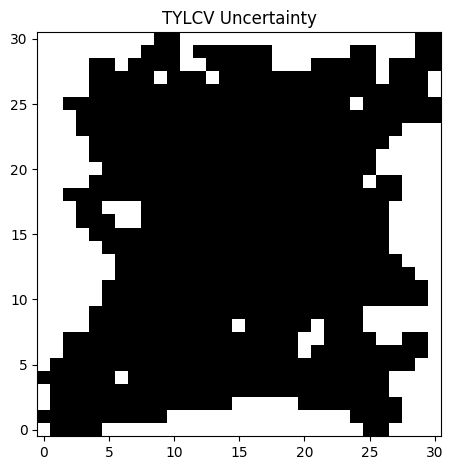

In [3]:

fig, ax = plt.subplots(1,1)
#wbf_figures.show_im_tylcv(results, ax)
#wbf_figures.show_env_tylcv(results, ax)
wbf_figures.show_unc_tylcv(results, ax)
wbf_figures.show_robot_path(results, ax, draw_robot=True)
# show_detections_individual_robot(results, ax, 1)
wbf_figures.show_detections(results, ax)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 43 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'H', 'L', 'P', 'R', 'S', 'T', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 36, 38, 39, 40, 43, 47, 51, 53, 54, 55, 57, 58, 60, 68, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
INFO:fontTools.subset:Closed glyph list ov

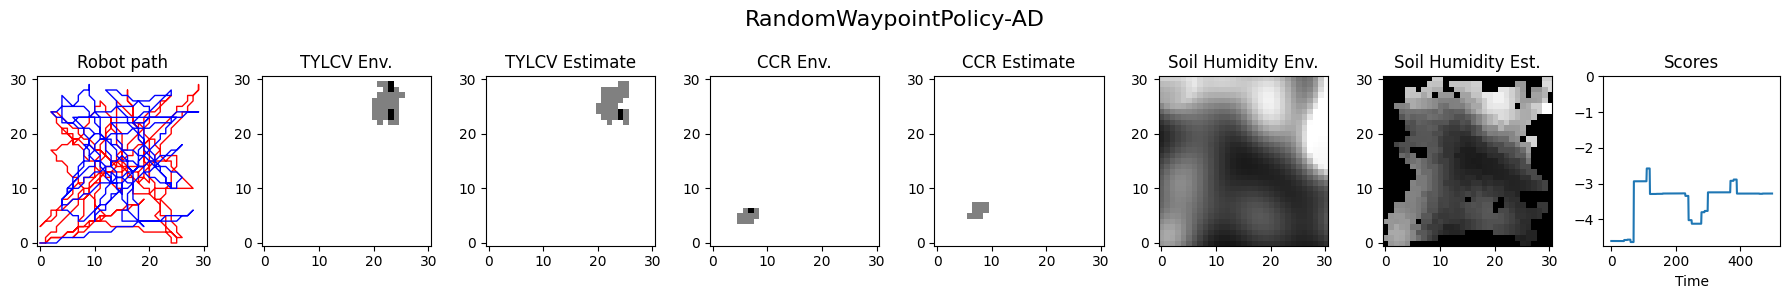

In [ ]:
# a little hack to see if it can be just hacked to work
results["policy-name"] = results["robots"][0].policy_name

end_of_day_graphs(results, "daily-summary.pdf", plot_uncertainty = False)